In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sn
import copy
from sklearn.impute import KNNImputer, SimpleImputer


['ID', 'time_interval_s', 'experience_key', 'time_elapsed', 'TemperatureChamber_0_Celsius', 'TemperatureChamber_1_Celsius', 'TemperatureChamber_2_Celsius', 'TemperatureChamber_3_Celsius', 'TemperatureChamber_4_Celsius', 'TemperatureChamber_5_Celsius', 'TemperatureChamber_6_Celsius', 'TemperatureChamber_7_Celsius', 'TemperatureChamber_8_Celsius', 'C12_a_Celsius', 'C12_c_Celsius', 'C12_f_Celsius', 'C12_j_Celsius', 'C12_k_Celsius', 'C12_l_Celsius', 'C12_m_Celsius', 'C12_n_Celsius', 'C12_o_Celsius', 'C12_p_Celsius', 'C12_temperature_diamond_Celsius', 'C12_q_Celsius', 'C12_D_Celsius', 'C12_s_Volt', 'C12_t_Volt', 'C12_u_Volt', 'C12_v_Volt', 'C12_x_Volt', 'C12_y_mA', 'C12_z_Volt', 'C12_A_Volt', 'C12_B_Volt', 'C12_C_Volt', 'C12_E_Volt', 'C12_F_Volt', 'C12_G_mA', 'C12_current_controller_3v3_pll_mA', 'C12_current_controller_3v3_mA', 'C12_current_controller_5v5_detection_mA', 'C12_voltage_controller_3v3_pll_Volt', 'C12_voltage_controller_3v3_Volt', 'C12_voltage_controller_5v5_detection_Volt', 'to

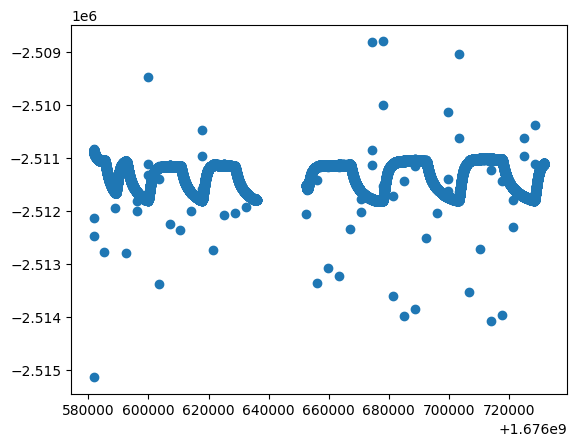

In [14]:

df = pd.read_csv('data_participant.csv')
columns = df.columns.tolist()
print(columns)

plt.scatter(df['timestamp_start'], df['C12_magnetometer_Bx'])


## Some data cleaning through reasoning

In [15]:
# assumption: you cant fill the NaN temperatures with 0 (0C is not neutral)
# but current and voltages of 0 should maybe work?

columns_to_fill_0 = [
    'C12_s_Volt', 'C12_t_Volt', 'C12_u_Volt', 'C12_v_Volt', 'C12_x_Volt',
    'C12_y_mA', 'C12_z_Volt', 'C12_A_Volt', 'C12_B_Volt', 'C12_C_Volt',
    'C12_E_Volt', 'C12_F_Volt', 'C12_G_mA', 'C12_current_controller_3v3_pll_mA',
    'C12_current_controller_3v3_mA', 'C12_current_controller_5v5_detection_mA',
    'C12_voltage_controller_3v3_pll_Volt', 'C12_voltage_controller_3v3_Volt',
    'C12_voltage_controller_5v5_detection_Volt'
]

# Fill specified columns with 0
df[columns_to_fill_0] = df[columns_to_fill_0].fillna(0)

# observation: total_time_elapsed_s, time_interval_, ID and timestamp
# represent the same information, so I just keep timestamp_start as ID
# time_elapesed  is precise but resets so it's useless


# Sort the DataFrame by timestamp_start)
df.sort_values(by='timestamp_start', inplace=True)


# also C12_magnetometer_Bnorm can just be calculated
# by pythagoreas equation so I'm dropping it too, the 
# xyz components of the vector field are more important

columns_to_drop = ['total_time_elapsed_s', 'experience_key',
                   'time_interval_s', 'time_elapsed', 'C12_magnetometer_Bnorm','ID']
df.drop(columns_to_drop, axis=1, inplace=True)


df.head()

,TemperatureChamber_0_Celsius,TemperatureChamber_1_Celsius,TemperatureChamber_2_Celsius,TemperatureChamber_3_Celsius,TemperatureChamber_4_Celsius,TemperatureChamber_5_Celsius,TemperatureChamber_6_Celsius,TemperatureChamber_7_Celsius,TemperatureChamber_8_Celsius,C12_a_Celsius,...,C12_current_controller_3v3_pll_mA,C12_current_controller_3v3_mA,C12_current_controller_5v5_detection_mA,C12_voltage_controller_3v3_pll_Volt,C12_voltage_controller_3v3_Volt,C12_voltage_controller_5v5_detection_Volt,timestamp_start,C12_magnetometer_Bx,C12_magnetometer_By,C12_magnetometer_Bz
0,17.5325,17.6350,19.6925,15.4825,15.5300,20.6875,21.2100,20.6175,21.0250,NaN,...,0.00000,0.000000,0.000000,0.000,0.000,0.000,1676581691,-2512471.250,1229968.125,-107012.3750
1,17.3875,17.7575,19.9775,15.8825,15.4275,20.7000,20.9725,20.6175,20.9250,NaN,...,0.00000,0.000000,0.000000,0.000,0.000,0.000,1676581692,-2515132.850,1229105.550,-107148.9281
2,17.2725,17.8150,19.8125,15.4475,15.0275,20.4575,20.6225,20.6575,21.3750,NaN,...,367.99997,478.399994,70.487808,3.272,3.344,5.528,1676581693,-2512140.000,1230410.025,-106566.7906
3,17.3425,17.6900,19.9150,15.4475,15.2400,20.4700,21.2600,20.6275,20.6225,19.315826,...,0.00000,0.000000,0.000000,0.000,0.000,0.000,1676581694,-2510852.850,1230520.400,-107043.1875
4,17.2925,17.7600,19.7975,15.4800,15.3475,20.6300,20.8950,20.7775,20.8700,NaN,...,0.00000,0.000000,0.000000,0.000,0.000,0.000,1676581695,-2510852.125,1230521.458,-107043.3789


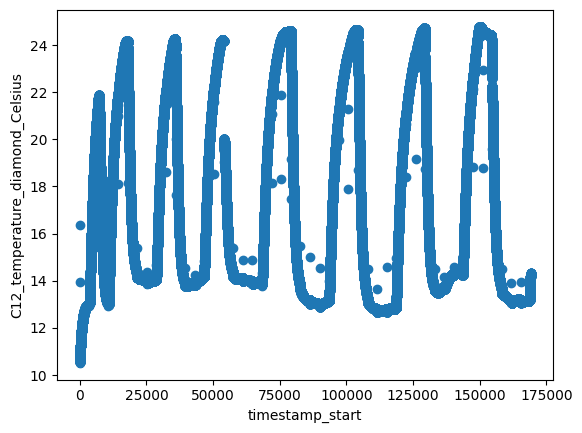

In [16]:
# observations: 
# - C12_temperature_diamond_Celsius always has a value
# -> try to see if that has a time relationship

plt.scatter(df.index, df['C12_temperature_diamond_Celsius'])
plt.xlabel('timestamp_start')
plt.ylabel('C12_temperature_diamond_Celsius')
plt.show()




In [17]:
plot_df = df.head(100)
plot_df.head()


,TemperatureChamber_0_Celsius,TemperatureChamber_1_Celsius,TemperatureChamber_2_Celsius,TemperatureChamber_3_Celsius,TemperatureChamber_4_Celsius,TemperatureChamber_5_Celsius,TemperatureChamber_6_Celsius,TemperatureChamber_7_Celsius,TemperatureChamber_8_Celsius,C12_a_Celsius,...,C12_current_controller_3v3_pll_mA,C12_current_controller_3v3_mA,C12_current_controller_5v5_detection_mA,C12_voltage_controller_3v3_pll_Volt,C12_voltage_controller_3v3_Volt,C12_voltage_controller_5v5_detection_Volt,timestamp_start,C12_magnetometer_Bx,C12_magnetometer_By,C12_magnetometer_Bz
0,17.5325,17.6350,19.6925,15.4825,15.5300,20.6875,21.2100,20.6175,21.0250,NaN,...,0.00000,0.000000,0.000000,0.000,0.000,0.000,1676581691,-2512471.250,1229968.125,-107012.3750
1,17.3875,17.7575,19.9775,15.8825,15.4275,20.7000,20.9725,20.6175,20.9250,NaN,...,0.00000,0.000000,0.000000,0.000,0.000,0.000,1676581692,-2515132.850,1229105.550,-107148.9281
2,17.2725,17.8150,19.8125,15.4475,15.0275,20.4575,20.6225,20.6575,21.3750,NaN,...,367.99997,478.399994,70.487808,3.272,3.344,5.528,1676581693,-2512140.000,1230410.025,-106566.7906
3,17.3425,17.6900,19.9150,15.4475,15.2400,20.4700,21.2600,20.6275,20.6225,19.315826,...,0.00000,0.000000,0.000000,0.000,0.000,0.000,1676581694,-2510852.850,1230520.400,-107043.1875
4,17.2925,17.7600,19.7975,15.4800,15.3475,20.6300,20.8950,20.7775,20.8700,NaN,...,0.00000,0.000000,0.000000,0.000,0.000,0.000,1676581695,-2510852.125,1230521.458,-107043.3789


Ok this is getting errors, TODO: debug

In [18]:
# # Create a figure
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Labels
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# # Initial plot using the first time point
# initial_time = plot_df.index[0]
# x_init = plot_df.loc[initial_time, 'C12_magnetometer_Bx']
# y_init = plot_df.loc[initial_time, 'C12_magnetometer_By']
# z_init = plot_df.loc[initial_time, 'C12_magnetometer_Bz']

# # Draw initial vector from (0,0,0) to (x_init, y_init, z_init)
# quiver = ax.quiver(0, 0, 0, x_init, y_init, z_init, color='b')

# # Update function for animation


# def update(frame):
#     current_time = plot_df.index[frame]
#     x = plot_df.loc[current_time, 'C12_magnetometer_Bx']
#     y = plot_df.loc[current_time, 'C12_magnetometer_By']
#     z = plot_df.loc[current_time, 'C12_magnetometer_Bz']

#     quiver.set_segments([(0, 0, 0, x, y, z)])
#     return quiver,


# # Create an animation
# ani = FuncAnimation(fig, update, frames=range(len(plot_df.index)), blit=False)

# # Save the animation as a GIF
# ani.save('3d_vectors.gif', writer='imagemagick')

# To display the animation in Jupyter Notebook, uncomment the following line:
# plt.show()


So we observe sinusoidal relationships throughout which actually makes sense considering
the current seems to be AC



linear regression model which independent columns to choose?
feature selection

regularized penalized loss/cost term

Filter (correlation), Wrapper (ML model), Embedded (Loss, regularization)

## Computational methods of feature selection
### Variance
___
shows the variance (σ^2) of the dataset this helps you see which columns vary the most therefore are more likely to affect the data

by itself variance doesn't say much, look at correlation also

In [19]:
df.var().sort_values()


C12_F_Volt                                   3.385383e-07
C12_A_Volt                                   3.403784e-07
C12_z_Volt                                   2.351704e-01
C12_B_Volt                                   3.472600e-01
C12_E_Volt                                   9.781765e-01
TemperatureChamber_8_Celsius                 1.293973e+00
TemperatureChamber_7_Celsius                 1.318102e+00
TemperatureChamber_6_Celsius                 1.468166e+00
C12_voltage_controller_3v3_pll_Volt          2.072643e+00
C12_v_Volt                                   2.117565e+00
C12_x_Volt                                   2.122220e+00
C12_t_Volt                                   2.152589e+00
C12_voltage_controller_3v3_Volt              2.156767e+00
TemperatureChamber_5_Celsius                 2.431005e+00
TemperatureChamber_2_Celsius                 3.703312e+00
C12_s_Volt                                   4.444624e+00
C12_voltage_controller_5v5_detection_Volt    5.893963e+00
TemperatureCha

### Correlation
_____
plotting correlation helps you see how a variable linearly affects another
1 is a positive linear correlation
-1 is an inverse relation
0 means no effect

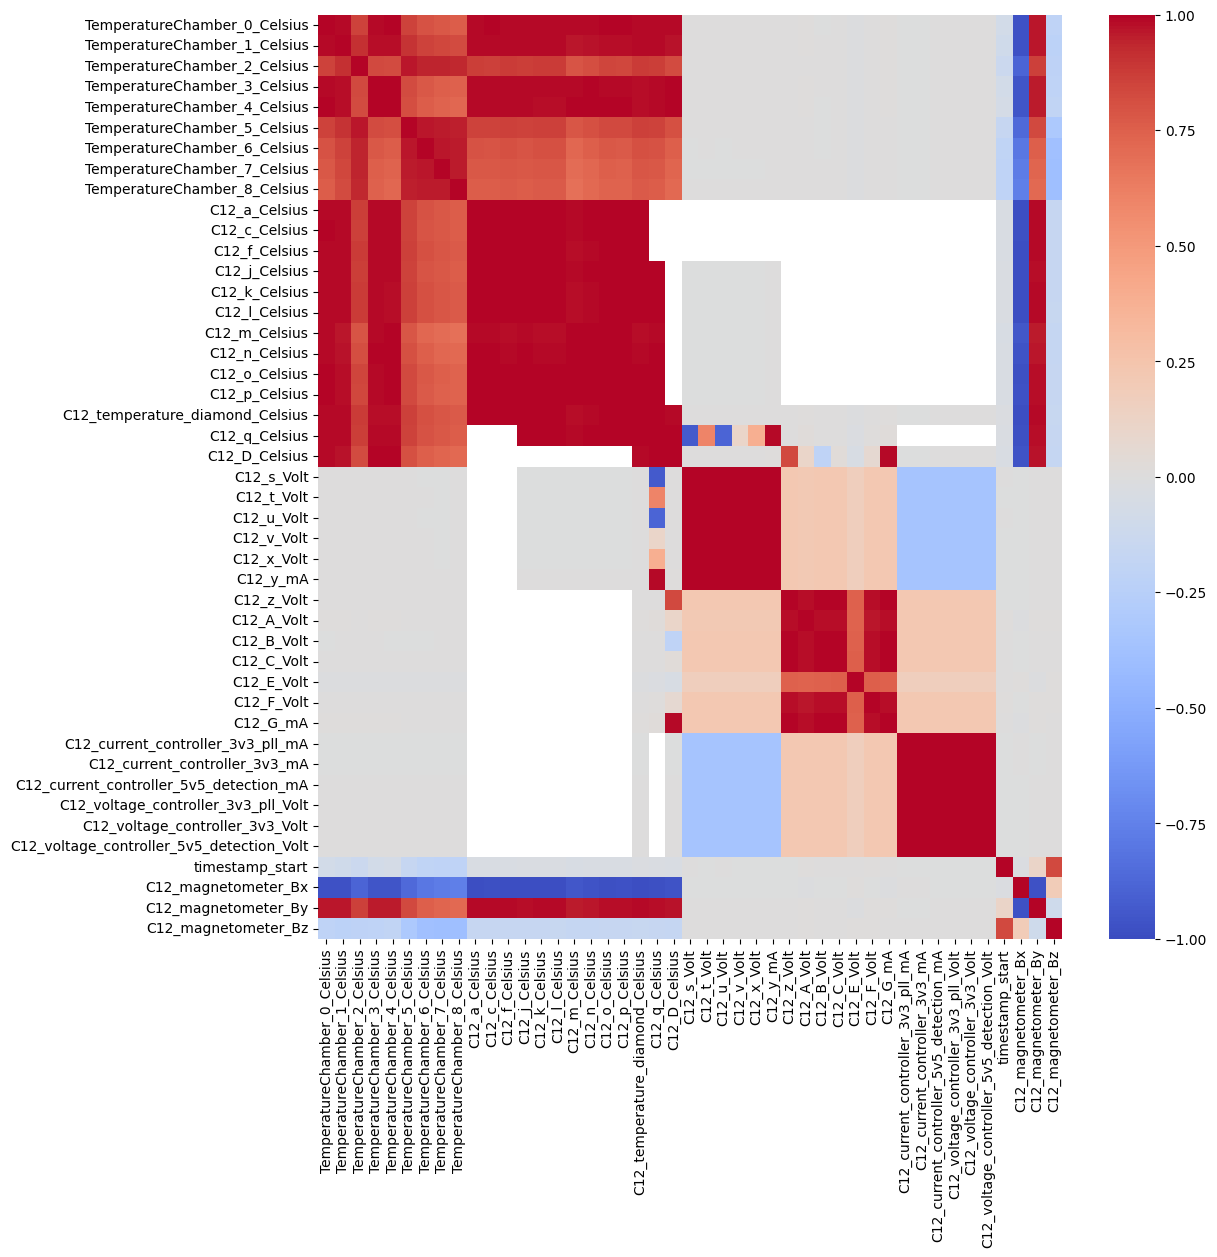

In [20]:
def corr_heatmap(df):
    graph_size = (12, 12)
    fig, ax = plt.subplots(figsize=graph_size)
    sn.heatmap(df.corr(), ax=ax, vmin=-1, vmax=1, cmap='coolwarm')
    plt.show()

corr_heatmap(df)

So I can tell that current and Voltage don't affect our field variables for shit, we can just take em out

I can also tell that temperature is strongly correlated to itself so I can most likely fill NaN temperature numbers with other temperature numbers and it'll be fine

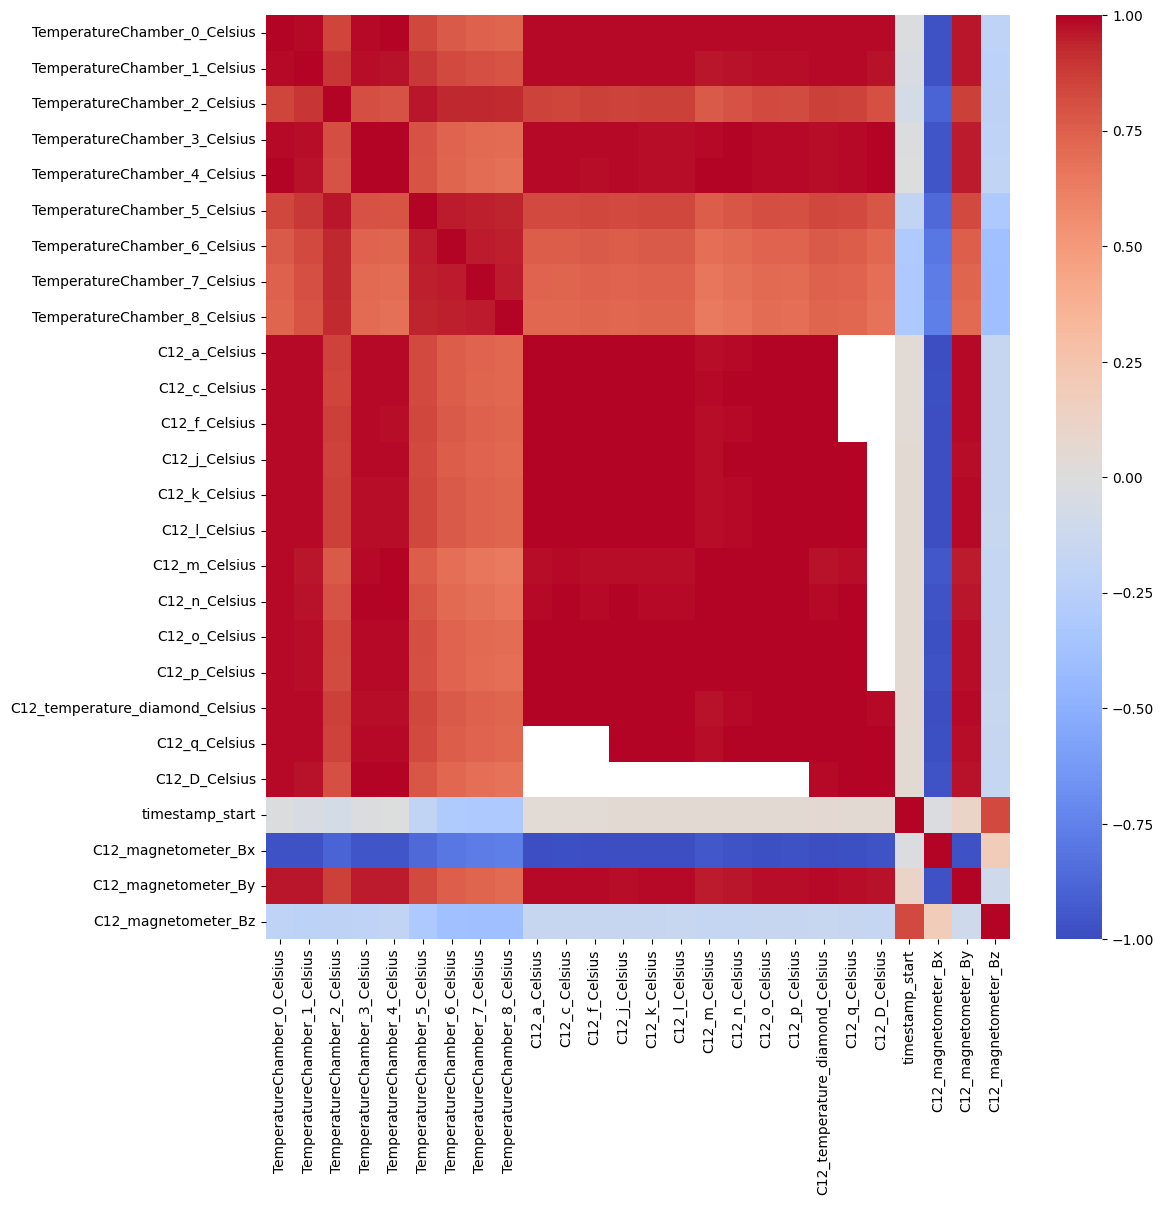

In [21]:
# drop voltage and current 
columns_elec = [col for col in df.columns if col.endswith(("Volt", "mA"))]
df = df.drop(columns=columns_elec)
#drop NaN field values
columns_to_check = ['C12_magnetometer_Bx', 'C12_magnetometer_By', 'C12_magnetometer_Bz']
df = df.dropna(subset=columns_to_check, how='any')
df
corr_heatmap(df)

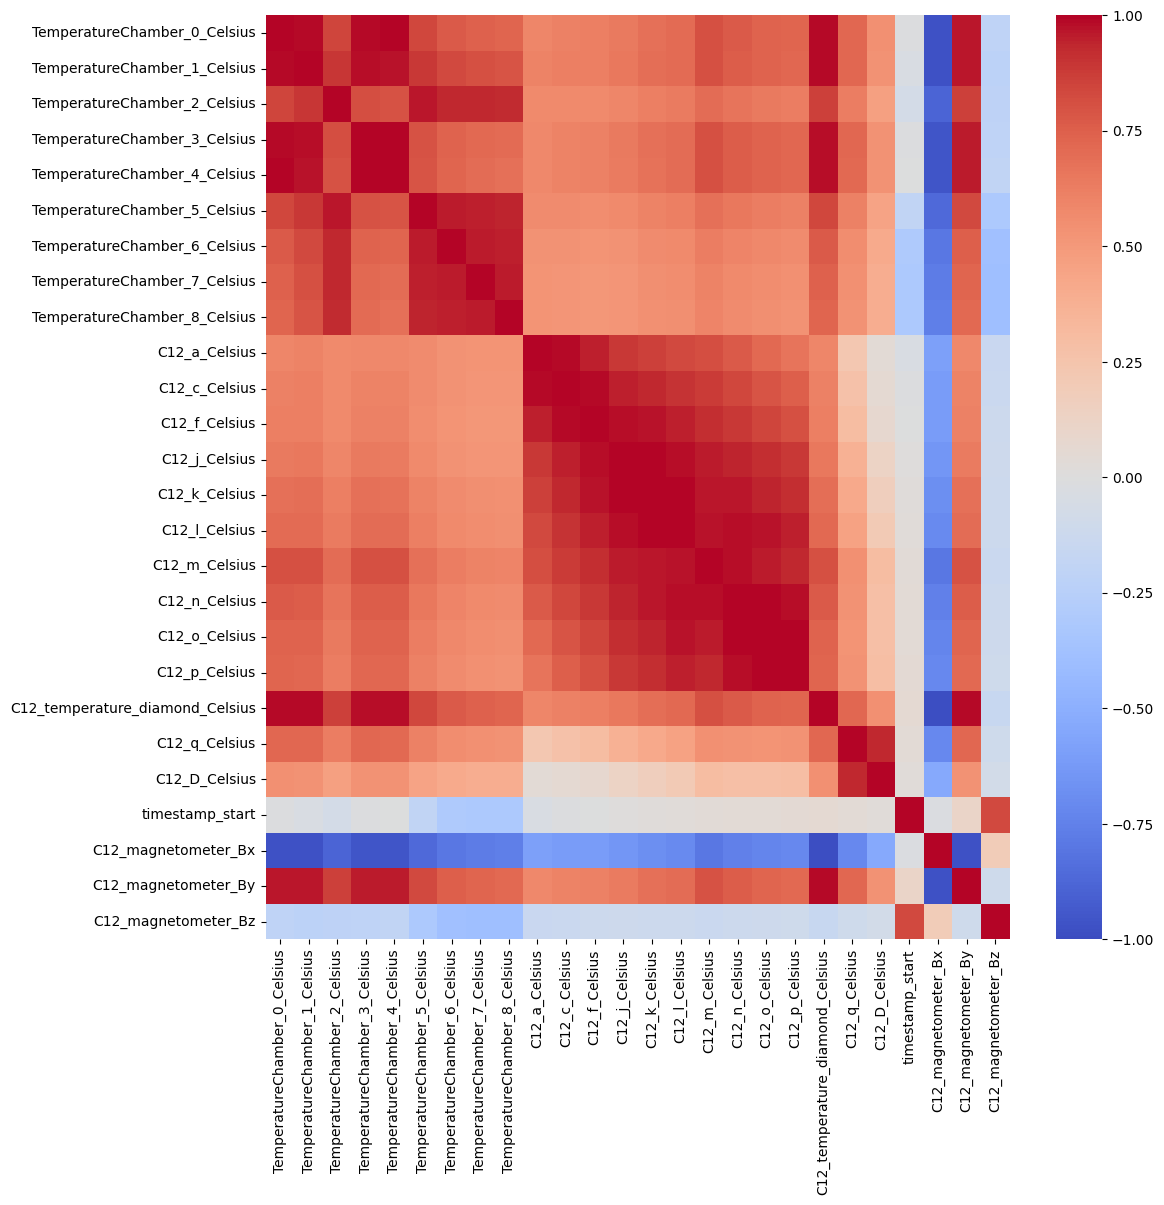

,TemperatureChamber_0_Celsius,TemperatureChamber_1_Celsius,TemperatureChamber_2_Celsius,TemperatureChamber_3_Celsius,TemperatureChamber_4_Celsius,TemperatureChamber_5_Celsius,TemperatureChamber_6_Celsius,TemperatureChamber_7_Celsius,TemperatureChamber_8_Celsius,C12_a_Celsius,...,C12_n_Celsius,C12_o_Celsius,C12_p_Celsius,C12_temperature_diamond_Celsius,C12_q_Celsius,C12_D_Celsius,timestamp_start,C12_magnetometer_Bx,C12_magnetometer_By,C12_magnetometer_Bz
0,17.5325,17.6350,19.6925,15.4825,15.5300,20.6875,21.2100,20.6175,21.0250,20.667874,...,18.746521,19.556580,19.795441,16.368673,16.368673,16.368673,1676581691,-2512471.250,1229968.125,-107012.3750
1,17.3875,17.7575,19.9775,15.8825,15.4275,20.7000,20.9725,20.6175,20.9250,20.289575,...,15.841602,15.206177,14.570752,13.935328,19.596497,23.171265,1676581692,-2515132.850,1229105.550,-107148.9281
2,17.2725,17.8150,19.8125,15.4475,15.0275,20.4575,20.6225,20.6575,21.3750,20.412662,...,13.676293,12.713955,11.751616,10.789278,10.789278,10.789278,1676581693,-2512140.000,1230410.025,-106566.7906
3,17.3425,17.6900,19.9150,15.4475,15.2400,20.4700,21.2600,20.6275,20.6225,19.315826,...,13.970138,12.820965,11.671792,10.522618,10.522618,10.522618,1676581694,-2510852.850,1230520.400,-107043.1875
4,17.2925,17.7600,19.7975,15.4800,15.3475,20.6300,20.8950,20.7775,20.8700,20.551624,...,18.746521,19.516571,19.795441,10.536246,19.556580,19.556580,1676581695,-2510852.125,1230521.458,-107043.3789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132759,16.8500,16.8725,18.3675,15.8525,15.7350,18.3550,19.5400,19.1325,19.4275,18.914992,...,15.327436,14.814928,14.302420,13.789912,13.789912,13.789912,1676731873,-2511104.900,1230698.100,-106916.3125
132760,17.3400,17.0025,18.5925,15.3650,15.5800,18.7875,19.2650,18.5550,19.3575,21.455231,...,21.115082,22.234863,22.671906,13.789305,13.789305,13.789305,1676731874,-2511100.150,1230693.225,-106914.0891
132761,17.1100,16.8300,18.5600,15.7550,15.4375,18.8900,19.0200,19.1225,19.2550,18.758292,...,15.281334,14.784626,14.287918,13.791209,22.308136,28.983795,1676731875,-2511111.208,1230703.167,-106912.2201
132762,17.2700,16.6400,18.1150,15.5100,15.4825,18.4100,18.8025,18.8225,19.3200,18.817244,...,15.297953,14.795198,14.292442,13.789686,13.789686,13.789686,1676731876,-2511107.900,1230699.025,-106914.0484


In [22]:
# due to the strong celcius correlation, imma try to fill in missing values, first by interpolation 
# Identify columns ending with 'Celsius'
celsius_cols = [col for col in df.columns if col.endswith('Celsius')]

interpolate_df = copy.deepcopy(df)

# Apply interpolation row-wise for only the 'Celsius' columns
interpolate_df[celsius_cols] = interpolate_df[celsius_cols].apply(
    lambda row: row.interpolate(), axis=1)
corr_heatmap(interpolate_df)
interpolate_df.to_csv('data_nan_interpolated.csv', index=False)
interpolate_df


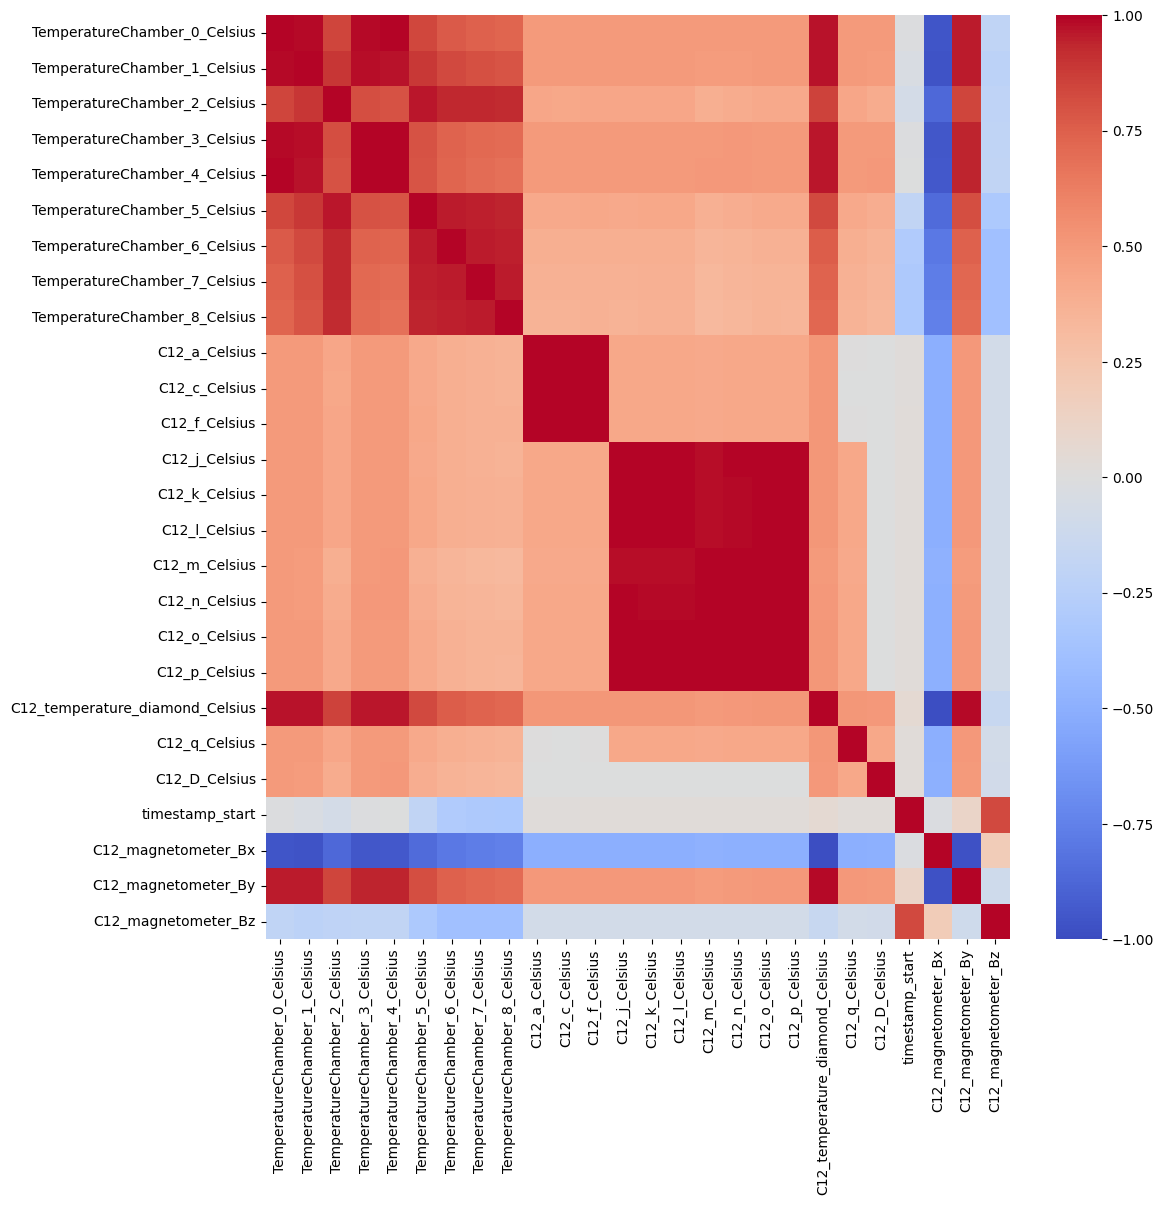

In [23]:
# try filling by the mean value
simp = SimpleImputer(strategy='mean')

mean_df = copy.deepcopy(df)
mean_df = pd.DataFrame(simp.fit_transform(mean_df), columns = df.columns)

mean_df
mean_df.to_csv('data_mean_imputed.csv', index=False)

corr_heatmap(mean_df)

In [24]:
# try filling missing values by k-nearest-neighbours

knn_df = copy.deepcopy(df)

kimp = KNNImputer(n_neighbors=3)
# Perform KNN imputation on the DataFrame
knn_df = pd.DataFrame(kimp.fit_transform(knn_df), columns=knn_df.columns)

corr_heatmap(knn_df)
knn_df
knn_df.to_csv('data_knn_imputed.csv', index= False)

from the different NaN filling techniques used here, interpolate seems to strike the best bgalance between runtime and correlation (knn takes about 40 mins on my cpu). But does higher correlation mean better results? 

Multiple dependent variables
multivariate linear regression

"you should actually check for correlations among the residuals in your multiple models, rather than for correlations among the dependent variables as such. The fact that the latter are correlated by itself tells you nothing about whether your estimates will improve by modelling them jointly."


linear algebra dependent, independent, invertible

"A reasonable possibility is to make a Principal Component Analysis (PCA) of the 𝑞
 dependent variables 𝑌𝑖
 and construct other 𝑞
 independent variables as linear combinations:
𝑌̃ 𝑖=𝜆𝑖,1𝑌1+…𝜆𝑖,𝑞𝑌𝑞
Then, try to correleate each 𝑌̃ 𝑖
 with the 𝑝
 𝑋𝑖
. Thus, you can select the significant coefficients, eliminating non-significant effects. Finally you have:"

https://scikit-learn.org/stable/modules/impute.html#impute
'missing value' vs 'sparse matrix'


dimension, linearly independent


cest quoi linear layer
nn.lienar

forward?